# Data Analysis & Data Presentation (Movies Dataset)

## Data Import and first Inspection

__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv('movies_complete.csv',parse_dates=['release_date'])
df.head(3)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch


In [3]:
df.isnull().sum()

id                           0
title                        0
tagline                  24407
release_date                34
genres                    2105
belongs_to_collection    40228
original_language           10
budget_musd              35837
revenue_musd             37306
production_companies     11335
production_countries      5856
vote_count                   0
vote_average              2614
popularity                   0
runtime                   1512
overview                   951
spoken_languages          3597
poster_path                224
cast                      2189
cast_size                    0
crew_size                    0
director                   731
dtype: int64

In [4]:
df.loc[[df['cast_size'].idxmax()]]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
916,2897,Around the World in Eighty Days,"It's a wonderful world, if you'll only take th...",1956-10-17,Adventure|Comedy|Family|Fantasy|Romance,NaN,en,6.0,42.0,Michael Todd Company,...,6.5,6.164226,167.0,Based on the famous book by Jules Verne the mo...,English|Español|Français,<img src='http://image.tmdb.org/t/p/w185//esBA...,David Niven|Cantinflas|Finlay Currie|Robert Mo...,313,34,Michael Anderson


In [5]:
df[df['cast_size']==df['cast_size'].max()]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
916,2897,Around the World in Eighty Days,"It's a wonderful world, if you'll only take th...",1956-10-17,Adventure|Comedy|Family|Fantasy|Romance,NaN,en,6.0,42.0,Michael Todd Company,...,6.5,6.164226,167.0,Based on the famous book by Jules Verne the mo...,English|Español|Français,<img src='http://image.tmdb.org/t/p/w185//esBA...,David Niven|Cantinflas|Finlay Currie|Robert Mo...,313,34,Michael Anderson


In [6]:
df.dtypes

id                                int64
title                            object
tagline                          object
release_date             datetime64[ns]
genres                           object
belongs_to_collection            object
original_language                object
budget_musd                     float64
revenue_musd                    float64
production_companies             object
production_countries             object
vote_count                      float64
vote_average                    float64
popularity                      float64
runtime                         float64
overview                         object
spoken_languages                 object
poster_path                      object
cast                             object
cast_size                         int64
crew_size                         int64
director                         object
dtype: object

In [7]:
df['profit']=df['revenue_musd']-df['budget_musd']

In [8]:
df['roi']=df['revenue_musd']/df['budget_musd']

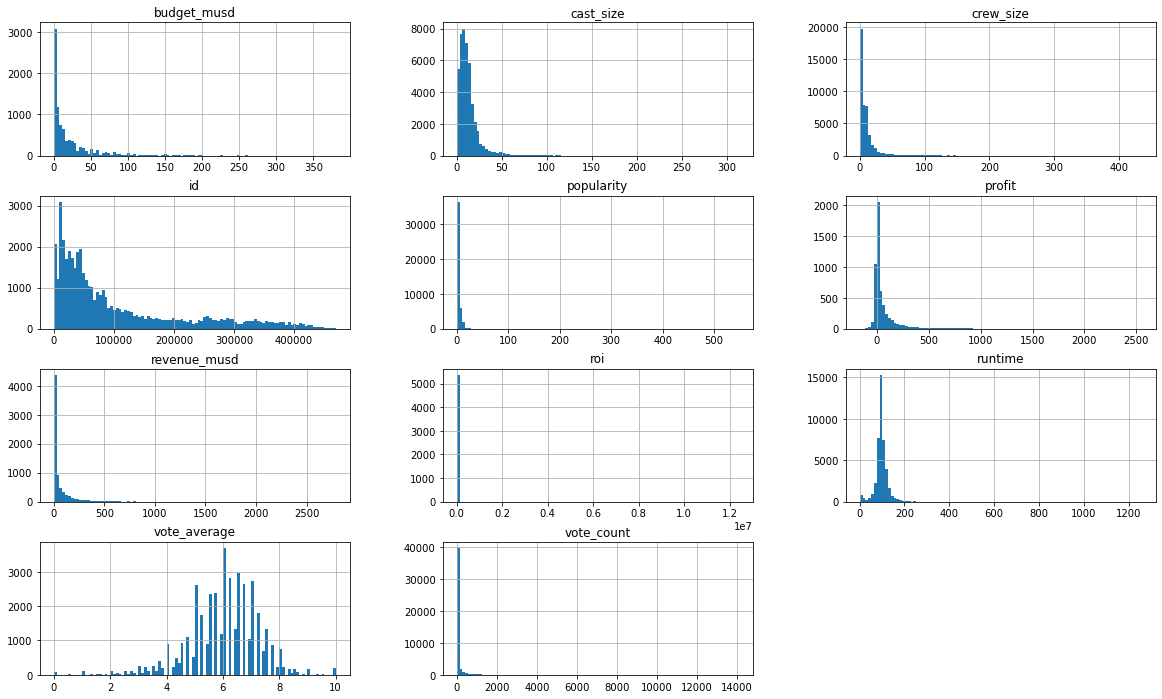

In [10]:
df.hist(figsize=(20,12),bins=100);

In [11]:
df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size,profit,roi
count,44691.000000,8854.000000,7385.000000,44691.000000,42077.000000,44691.000000,43179.000000,44691.000000,44691.000000,5371.000000,5.371000e+03
mean,107186.242845,21.669886,68.968649,111.653778,6.003341,2.957460,97.566850,12.479090,10.313643,59.326449,5.576258e+03
std,111806.362236,34.359837,146.608966,495.322313,1.281060,6.040008,34.653409,12.124663,15.892154,139.643353,2.170583e+05
min,2.000000,0.000001,0.000001,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-165.710090,5.217391e-07
25%,26033.500000,2.000000,2.405420,3.000000,5.300000,0.402038,86.000000,6.000000,2.000000,-1.456000,7.883507e-01
50%,59110.000000,8.200000,16.872671,10.000000,6.100000,1.150055,95.000000,10.000000,6.000000,11.112916,2.058750e+00
75%,154251.000000,25.000000,67.642693,35.000000,6.800000,3.768882,107.000000,15.000000,12.000000,62.341950,4.242222e+00
max,469172.000000,380.000000,2787.965087,14075.000000,10.000000,547.488298,1256.000000,313.000000,435.000000,2550.965087,1.239638e+07


In [12]:
from IPython.display import HTML

In [13]:
pd.options.display.max_colwidth=200

In [14]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'profit', 'roi'],
      dtype='object')

In [15]:
film=df[['poster_path','title','budget_musd','revenue_musd','vote_count','vote_average','popularity','profit','roi']].copy()

In [16]:
film.rename(columns={'poster_path':'','budget_musd':'budget','revenue_musd':'revenue','vote_count':'votes',
                    'vote_average':'average_rating'},inplace=True)

In [17]:
film.head()

,,title,budget,revenue,votes,average_rating,popularity,profit,roi
0,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Toy Story,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
1,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Jumanji,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
2,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
4,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN


In [18]:
film.set_index('title',inplace=True)
show=film.head(4)

In [19]:
HTML(show.to_html(escape=False))

,,budget,revenue,votes,average_rating,popularity,profit,roi
title,,,,,,,,
Toy Story,,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
Jumanji,,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
Grumpier Old Men,,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
Waiting to Exhale,,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760


## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Define__ an appropriate __user-defined function__ to reuse code.

In [20]:
def high_low(n, by, min_bud=0, min_votes=0, ascending=False):
    df2=film.loc[(film['budget']>=min_bud) & (film['votes']>=min_votes),
                 ['',by]].sort_values(by=by,ascending=ascending).head(n).copy()
    return HTML(df2.to_html(escape=False))

__Movies Top 5 - Highest Revenue__

In [21]:
high_low(n=5,by='revenue')

,,revenue
title,,
Avatar,,2787.965087
Star Wars: The Force Awakens,,2068.223624
Titanic,,1845.034188
The Avengers,,1519.557910
Jurassic World,,1513.528810


__Movies Top 5 - Highest Budget__

In [22]:
high_low(5,by='budget')

,,budget
title,,
Pirates of the Caribbean: On Stranger Tides,,380.0
Pirates of the Caribbean: At World's End,,300.0
Avengers: Age of Ultron,,280.0
Superman Returns,,270.0
John Carter,,260.0


__Movies Top 5 - Highest Profit__

In [23]:
high_low(5,by='profit')

,,profit
title,,
Avatar,,2550.965087
Star Wars: The Force Awakens,,1823.223624
Titanic,,1645.034188
Jurassic World,,1363.528810
Furious 7,,1316.249360


__Movies Top 5 - Lowest Profit__

In [24]:
high_low(5,by='profit',ascending=True)

,,profit
title,,
The Lone Ranger,,-165.710090
The Alamo,,-119.180039
Mars Needs Moms,,-111.007242
Valerian and the City of a Thousand Planets,,-107.447384
The 13th Warrior,,-98.301101


__Movies Top 5 - Highest ROI__

In [25]:
high_low(5,by='roi',ascending=False,min_bud=50)

,,roi
title,,
Minions,,15.631499
Jurassic Park,,14.604762
The Twilight Saga: New Moon,,14.196549
Deadpool,,13.501948
Despicable Me 2,,12.773183


__Movies Top 5 - Lowest ROI__

In [26]:
high_low(5,by='roi',ascending=True,min_bud=50,)

,,roi
title,,
Foodfight!,,0.001134
Metropolis,,0.007022
Lolita,,0.017098
Child 44,,0.066487
The Adventures of Pluto Nash,,0.071040


__Movies Top 5 - Most Votes__

In [27]:
high_low(5,by='votes')

,,votes
title,,
Inception,,14075.0
The Dark Knight,,12269.0
Avatar,,12114.0
The Avengers,,12000.0
Deadpool,,11444.0


__Movies Top 5 - Highest Rating__

In [28]:
high_low(5,by='average_rating',min_votes=10 )

,,average_rating
title,,
Dilwale Dulhania Le Jayenge,,9.1
Stop Making Sense,,8.7
Human,,8.6
Tosun Pasha,,8.6
The Shawshank Redemption,,8.5


In [29]:
high_low(5,by="average_rating",min_votes=50)

,,average_rating
title,,
Dilwale Dulhania Le Jayenge,,9.1
Human,,8.6
The Shawshank Redemption,,8.5
The Godfather,,8.5
Pulp Fiction,,8.3


__Movies Top 5 - Lowest Rating__

In [30]:
high_low(5,by='average_rating',min_votes=50,ascending=True)

,,average_rating
title,,
Manos: The Hands of Fate,,2.0
House of the Dead,,2.8
Dragonball Evolution,,2.9
Hellraiser: Revelations,,3.0
Mega Piranha,,3.0


__Movies Top 5 - Most Popular__

In [31]:
high_low(5,by='popularity')

,,popularity
title,,
Minions,,547.488298
Wonder Woman,,294.337037
Beauty and the Beast,,287.253654
Baby Driver,,228.032744
Big Hero 6,,213.849907


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [32]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'profit', 'roi'],
      dtype='object')

In [33]:
selected_genre=df['genres'].str.contains('Science') & df['genres'].str.contains('Action')

In [34]:
selected_actor=df['cast'].str.contains('Bruce Willis')

In [35]:
df.loc[selected_genre & selected_actor,['title','vote_average']].sort_values(by='vote_average',ascending=False)

,title,vote_average
1448,The Fifth Element,7.3
19218,Looper,6.6
1786,Armageddon,6.5
14135,Surrogates,5.9
20333,G.I. Joe: Retaliation,5.4
27619,Vice,4.1


In [36]:
willis_sci_action_movie=df.loc[selected_genre & selected_actor,
                               ['title','vote_average','poster_path']].sort_values(by='vote_average',
                                                                                   ascending=False).set_index('poster_path')
willis_sci_action_movie

,title,vote_average
poster_path,,
<img src='http://image.tmdb.org/t/p/w185//fPtlCO1yQtnoLHOwKtWz7db6RGU.jpg' style='height:100px;'>,The Fifth Element,7.3
<img src='http://image.tmdb.org/t/p/w185//sNjL6SqErDBE8OUZlrDLkexfsCj.jpg' style='height:100px;'>,Looper,6.6
<img src='http://image.tmdb.org/t/p/w185//fMtOCd0EAdAzKtGLQiHjSUvbdNc.jpg' style='height:100px;'>,Armageddon,6.5
<img src='http://image.tmdb.org/t/p/w185//v3Z0Hbl0oe57njrrIPh0fJPFoo.jpg' style='height:100px;'>,Surrogates,5.9
<img src='http://image.tmdb.org/t/p/w185//3rWIZMzTKcCtV0eHJ70Z4Ru659f.jpg' style='height:100px;'>,G.I. Joe: Retaliation,5.4
<img src='http://image.tmdb.org/t/p/w185//nPqNoQ55RIrmmo9mpqg1jE3ENza.jpg' style='height:100px;'>,Vice,4.1


In [37]:
HTML(willis_sci_action_movie.to_html(escape=False))

,title,vote_average
poster_path,,
,The Fifth Element,7.3
,Looper,6.6
,Armageddon,6.5
,Surrogates,5.9
,G.I. Joe: Retaliation,5.4
,Vice,4.1


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [38]:
selected_cast=df['cast'].str.contains('Uma Thurman')

In [39]:
selected_director=df['director'].str.contains('Quentin Tarantino')

In [40]:
umn_tarantino_movie=df.loc[selected_cast & selected_director,
       ['title','poster_path','runtime']].sort_values(by='runtime',ascending=False).set_index('poster_path')

In [41]:
HTML(umn_tarantino_movie.to_html(escape=False))

,title,runtime
poster_path,,
,Pulp Fiction,154.0
,Kill Bill: Vol. 2,136.0
,Kill Bill: Vol. 1,111.0


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [42]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'profit', 'roi'],
      dtype='object')

In [43]:
df['production_companies'][0]

'Pixar Animation Studios'

In [44]:
df['release_date'].dtypes

dtype('<M8[ns]')

In [45]:
studio=df['production_companies'].str.contains('Pixar Animation Studios')

In [46]:
df['release_date'][1]

Timestamp('1995-12-15 00:00:00')

In [50]:
date=df['release_date'].between('2010-1-1','2015-12-31')

In [51]:
best_pixar_movie=df.loc[studio & date,
       ['poster_path','title','revenue_musd','release_date']].sort_values(by='revenue_musd',
                                                           ascending=False).set_index('poster_path')


In [52]:
HTML(best_pixar_movie.to_html(escape=False))

,title,revenue_musd,release_date
poster_path,,,
,Toy Story 3,1066.969703,2010-06-16
,Inside Out,857.611174,2015-06-09
,Monsters University,743.559607,2013-06-20
,Cars 2,559.852396,2011-06-11
,Brave,538.983207,2012-06-21
,The Good Dinosaur,331.926147,2015-11-14
,Day & Night,NaN,2010-06-17
,The Blue Umbrella,NaN,2013-02-12
,Toy Story of Terror!,NaN,2013-10-15


__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [58]:
selected_genre=df['genres'].str.contains("Action") | df['genres'].str.contains('Thriller')

In [59]:
df['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [60]:
eng_lan=df['original_language']=='en'

In [61]:
df['vote_average'].nunique()

92

In [62]:
min_rating=df['vote_average']>=7.5

In [63]:
df['vote_count'].value_counts()

1.0       3186
2.0       3056
3.0       2729
0.0       2614
4.0       2442
          ... 
4461.0       1
1085.0       1
1539.0       1
2487.0       1
3086.0       1
Name: vote_count, Length: 1820, dtype: int64

In [64]:
min_vote_count=df['vote_count']>=10

In [65]:
eng_bestmovie_recent=df.loc[selected_genre & eng_lan & min_rating & min_vote_count,
      ['title','poster_path','genres','release_date','vote_average']].sort_values(by='release_date',
                                                                                  ascending=False).set_index('poster_path').head(10)

In [66]:
HTML(eng_bestmovie_recent.to_html(escape=False))

,title,genres,release_date,vote_average
poster_path,,,,
,Descendants 2,TV Movie|Family|Action|Comedy|Music|Adventure,2017-07-21,7.5
,Dunkirk,Action|Drama|History|Thriller|War,2017-07-19,7.5
,The Book of Henry,Thriller|Drama|Crime,2017-06-16,7.6
,Guardians of the Galaxy Vol. 2,Action|Adventure|Comedy|Science Fiction,2017-04-19,7.6
,Logan,Action|Drama|Science Fiction,2017-02-28,7.6
,The Thinning,Thriller,2016-10-12,7.6
,11.22.63,Drama|History|Thriller,2016-02-15,8.0
,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5
,London Spy,Romance|Crime|Drama|Mystery|Thriller,2015-11-09,8.8


## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

In [67]:
df[['belongs_to_collection','title']].head(20)

,belongs_to_collection,title
0,Toy Story Collection,Toy Story
1,NaN,Jumanji
2,Grumpy Old Men Collection,Grumpier Old Men
3,NaN,Waiting to Exhale
4,Father of the Bride Collection,Father of the Bride Part II
5,NaN,Heat
6,NaN,Sabrina
7,NaN,Tom and Huck
8,NaN,Sudden Death
9,James Bond Collection,GoldenEye


In [68]:
df['franchise']=df['belongs_to_collection'].notna()
df['franchise']

0         True
1        False
2         True
3        False
4         True
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: franchise, Length: 44691, dtype: bool

In [70]:
df['franchise'].value_counts()

False    40228
True      4463
Name: franchise, dtype: int64

here,

    True = Franchise movie
    False = stand alone movie/ not Franchise movie

__Franchise vs. Stand-alone: Average Revenue__

In [71]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'profit', 'roi', 'franchise'],
      dtype='object')

In [72]:
df[['franchise','revenue_musd']].groupby('franchise').agg('mean').reset_index()

,franchise,revenue_musd
0,False,44.742814
1,True,165.708193


franchise movie has higher average revenue than stand-alone movie

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [73]:
df[['franchise','roi']].groupby('franchise').agg('median').reset_index()

,franchise,roi
0,False,1.619699
1,True,3.709195


__Franchise vs. Stand-alone: Average Budget__

In [74]:
df[['franchise','budget_musd']].groupby('franchise').agg('mean').reset_index()

,franchise,budget_musd
0,False,18.047741
1,True,38.319847


__Franchise vs. Stand-alone: Average Popularity__

In [75]:
df[['franchise','popularity']].groupby('franchise').agg('mean').reset_index()

,franchise,popularity
0,False,2.592726
1,True,6.245051


__Franchise vs. Stand-alone: Average Rating__

In [76]:
df[['franchise','vote_average']].groupby('franchise').agg('mean').reset_index()

,franchise,vote_average
0,False,6.008787
1,True,5.956806


So,

we can say that franchise movie has a higher budget, higher revenue, higher popularity, higher profit than stand-alone movie but the quality of stand-alone movie is little higher than franchise movie.

In [77]:
df.groupby('franchise').agg({'revenue_musd':'mean','vote_average':'mean','popularity':'mean',
                            'roi':'median','budget_musd':'mean'})

,revenue_musd,vote_average,popularity,roi,budget_musd
franchise,,,,,
False,44.742814,6.008787,2.592726,1.619699,18.047741
True,165.708193,5.956806,6.245051,3.709195,38.319847


## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

In [78]:
df[df['belongs_to_collection']=='James Bond Collection'].head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,profit,roi,franchise
9,710,GoldenEye,No limits. No fears. No substitutes.,1995-11-16,Adventure|Action|Thriller,James Bond Collection,en,58.0,352.194034,United Artists|Eon Productions,...,James Bond must unmask the mysterious head of the Janus Syndicate and prevent the leader from utilizing the GoldenEye weapons system to inflict devastating revenge on Britain.,English|Pусский|Español,<img src='http://image.tmdb.org/t/p/w185//z0ljRnNxIO7CRBhLEO0DvLgAFPR.jpg' style='height:100px;'>,Pierce Brosnan|Sean Bean|Izabella Scorupco|Famke Janssen|Joe Don Baker|Judi Dench|Gottfried John|Robbie Coltrane|Alan Cumming|Tchéky Karyo|Desmond Llewelyn|Samantha Bond|Michael Kitchen|Serena Gor...,20,46,Martin Campbell,294.194034,6.072311,True
1621,714,Tomorrow Never Dies,Yesterday is a memory. Today is history. Tomorrow is in the hands of one man.,1997-12-11,Adventure|Action|Thriller,James Bond Collection,en,110.0,333.011068,Eon Productions,...,A deranged media mogul is staging international incidents to pit the world's superpowers against each other. Now 007 must take on this evil mastermind in an adrenaline-charged battle to end his re...,Deutsch|English|Dansk|普通话|广州话 / 廣州話,<img src='http://image.tmdb.org/t/p/w185//3NJxMEgL2uYvdoC1YEDNdMym1vf.jpg' style='height:100px;'>,Pierce Brosnan|Jonathan Pryce|Michelle Yeoh|Teri Hatcher|Ricky Jay|Götz Otto|Joe Don Baker|Vincent Schiavelli|Judi Dench|Desmond Llewelyn|Samantha Bond|Colin Salmon|Geoffrey Palmer|Julian Fellowes...,34,20,Roger Spottiswoode,223.011068,3.027373,True
2240,707,A View to a Kill,Has James Bond finally met his match?,1985-05-24,Adventure|Action|Thriller,James Bond Collection,en,30.0,152.427960,Eon Productions,...,A newly developed microchip designed by Zorin Industries for the British Government that can survive the electromagnetic radiation caused by a nuclear explosion has landed in the hands of the KGB....,English,<img src='http://image.tmdb.org/t/p/w185//ieMTbSdYJJ7RZIW0X02NbwIAxMl.jpg' style='height:100px;'>,Roger Moore|Christopher Walken|Tanya Roberts|Grace Jones|Patrick Macnee|Patrick Bauchau|David Yip|Fiona Fullerton|Manning Redwood|Alison Doody|Willoughby Gray|Desmond Llewelyn|Robert Brown|Lois Ma...,42,16,John Glen,122.427960,5.080932,True
2804,658,Goldfinger,Everything he touches turns into excitement!,1964-09-17,Adventure|Action|Thriller,James Bond Collection,en,2.5,124.881062,United Artists|Eon Productions|Danjaq,...,"Special agent 007 (Sean Connery) comes face to face with one of the most notorious villains of all time, and now he must outwit and outgun the powerful tycoon to prevent him from cashing in on a d...",普通话|English|Español,<img src='http://image.tmdb.org/t/p/w185//iMjCK03daQBuGCbDZq15FLVDbFo.jpg' style='height:100px;'>,Sean Connery|Honor Blackman|Gert Fröbe|Shirley Eaton|Tania Mallet|Harold Sakata|Bernard Lee|Martin Benson|Cec Linder|Austin Willis|Lois Maxwell|Desmond Llewelyn|Burt Kwouk|Nadja Regin|Margaret Nol...,38,13,Guy Hamilton,122.381062,49.952425,True
2805,657,From Russia with Love,The world's masters of murder pull out all the stops to destroy Agent 007!,1963-10-11,Action|Thriller|Adventure,James Bond Collection,en,2.0,78.898765,United Artists|Eon Productions|Danjaq,...,"Agent 007 is back in the second installment of the James Bond series, this time battling a secret crime organization known as SPECTRE. Russians Rosa Klebb and Kronsteen are out to snatch a decodin...",English|Pусский|Türkçe|Română,<img src='http://image.tmdb.org/t/p/w185//xTle7ThbHKQgQYKcyKZ02gfSYIe.jpg' style='height:100px;'>,Sean Connery|Daniela Bianchi|Pedro Armendáriz|Lotte Lenya|Robert Shaw|Bernard Lee|Eunice Gayson|Walter Gotell|Francis de Wolff|Nadja Regin|Lois Maxwell|Aliza Gur|Desmond Llewelyn|Vladek Sheybal|Ge...,45,29,Terence Young,76.898765,39.449382,True


In [79]:
df['belongs_to_collection']

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [80]:
df['belongs_to_collection'].value_counts()

The Bowery Boys                   29
Totò Collection                   27
James Bond Collection             26
Zatôichi: The Blind Swordsman     26
The Carry On Collection           25
                                  ..
Tokyo Decadence series             1
Singam Collection                  1
Dark Rising Collection             1
China O'Brien Collection           1
Tomtar och Trolltyg Collection     1
Name: belongs_to_collection, Length: 1691, dtype: int64

In [81]:
franchise=df.groupby('belongs_to_collection').agg({'title':'count',
                                                   'budget_musd':['sum','mean'],
                                                  'revenue_musd':['sum','mean'],
                                                   'vote_average':'mean',
                                                  'roi':'median',
                                                   'popularity':'mean',
                                                  'vote_count':'mean'})
franchise

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2       130.0  65.0   366.780087   
00 Schneider Filmreihe                   1         0.0   NaN     0.000000   
08/15 Collection                         1         0.0   NaN     0.000000   
100 Girls Collection                     2         0.0   NaN     0.000000   
101 Dalmatians (Animated) Collection     2         4.0   4.0   215.880014   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1         0.0   NaN     0.000000   
Чебурашка и крокодил Гена                1         0.0   NaN     0.000000   
Что Творят мужчины! (Коллекция)          2         2.0   2.0     0.000000   
男はつらいよ シリーズ                              3         0.0   NaN     0.000000   
식객 시리즈                                   2         0.0   NaN     0.000000   

                                                 vote_average        roi  \
                                            mean         mean     median   
belongs_to_collection                                                      
... Has Fallen Collection             183.390043         6.00   2.864804   
00 Schneider Filmreihe                       NaN         6.50        NaN   
08/15 Collection                             NaN         5.90        NaN   
100 Girls Collection                         NaN         5.15        NaN   
101 Dalmatians (Animated) Collection  215.880014         6.25  53.970004   
...                                          ...          ...        ...   
Сказки Чуковского                            NaN         3.00        NaN   
Чебурашка и крокодил Гена                    NaN         6.70        NaN   
Что Творят мужчины! (Коллекция)              NaN         3.15        NaN   
男はつらいよ シリーズ                                  NaN         7.00        NaN   
식객 시리즈                                       NaN         4.95        NaN   

                                     popularity   vote_count  
                                           mean         mean  
belongs_to_collection                                         
... Has Fallen Collection             13.008090  2333.000000  
00 Schneider Filmreihe                 1.931299    16.000000  
08/15 Collection                       0.628127     4.000000  
100 Girls Collection                   3.078652    64.000000  
101 Dalmatians (Animated) Collection  13.063212   937.000000  
...                                         ...          ...  
Сказки Чуковского                      0.731334     3.000000  
Чебурашка и крокодил Гена              0.881504     7.000000  
Что Творят мужчины! (Коллекция)        1.299605     5.500000  
男はつらいよ シリーズ                            0.038901     0.666667  
식객 시리즈                                 0.157245     3.500000  

[1691 rows x 9 columns]

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [82]:
franchise.nlargest(10,columns=('title','count'))

title budget_musd             \
                                       count         sum       mean   
belongs_to_collection                                                 
The Bowery Boys                           29      0.0000        NaN   
Totò Collection                           27      0.0000        NaN   
James Bond Collection                     26   1539.6500  59.217308   
Zatôichi: The Blind Swordsman             26      0.0000        NaN   
The Carry On Collection                   25      0.0000        NaN   
Charlie Chan (Sidney Toler) Collection    21      0.0000        NaN   
Pokémon Collection                        20    250.7204  50.144080   
Godzilla (Showa) Collection               16      2.8100   0.562000   
Charlie Chan (Warner Oland) Collection    15      0.0000        NaN   
Dragon Ball Z (Movie) Collection          15      5.0000   5.000000   

                                       revenue_musd             vote_average  \
                                                sum        mean         mean   
belongs_to_collection                                                          
The Bowery Boys                            0.000000         NaN     6.675000   
Totò Collection                            0.000000         NaN     6.837037   
James Bond Collection                   7106.970239  273.345009     6.338462   
Zatôichi: The Blind Swordsman              0.000000         NaN     6.403846   
The Carry On Collection                    0.000000         NaN     6.168000   
Charlie Chan (Sidney Toler) Collection     0.000000         NaN     6.609524   
Pokémon Collection                       601.865958   66.873995     6.055000   
Godzilla (Showa) Collection                0.000000         NaN     5.975000   
Charlie Chan (Warner Oland) Collection     0.000000         NaN     6.658333   
Dragon Ball Z (Movie) Collection         112.121192   56.060596     6.606667   

                                              roi popularity   vote_count  
                                           median       mean         mean  
belongs_to_collection                                                      
The Bowery Boys                               NaN   0.198006     0.724138  
Totò Collection                               NaN   1.047324    18.037037  
James Bond Collection                    6.128922  13.453502  1284.307692  
Zatôichi: The Blind Swordsman                 NaN   1.100603    11.192308  
The Carry On Collection                       NaN   3.220430    21.040000  
Charlie Chan (Sidney Toler) Collection        NaN   0.630996     5.809524  
Pokémon Collection                       4.464976   4.374284    71.100000  
Godzilla (Showa) Collection                   NaN   3.422842    39.750000  
Charlie Chan (Warner Oland) Collection        NaN   0.664986     6.866667  
Dragon Ball Z (Movie) Collection        12.353638   6.183563   133.333333

In [83]:
franchise.nlargest(10,columns=('budget_musd','mean'))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
Tangled Collection                      2       260.0  260.0   591.794936   
Pirates of the Caribbean Collection     5      1250.0  250.0  4521.576826   
The Avengers Collection                 2       500.0  250.0  2924.961604   
The Hobbit Collection                   3       750.0  250.0  2935.523356   
Man of Steel Collection                 2       475.0  237.5  1536.105712   
Avatar Collection                       1       237.0  237.0  2787.965087   
The Amazing Spider-Man Collection       2       415.0  207.5  1457.933289   
World War Z Collection                  1       200.0  200.0   531.865000   
Spider-Man Collection                   3       597.0  199.0  2496.346518   
The Dark Knight Collection              3       585.0  195.0  2463.716216   

                                                 vote_average        roi  \
                                            mean         mean     median   
belongs_to_collection                                                      
Tangled Collection                    591.794936     7.250000   2.276134   
Pirates of the Caribbean Collection   904.315365     6.880000   3.453009   
The Avengers Collection              1462.480802     7.350000   5.963190   
The Hobbit Collection                 978.507785     7.233333   3.833600   
Man of Steel Collection               768.052856     6.100000   3.219510   
Avatar Collection                    2787.965087     7.200000  11.763566   
The Amazing Spider-Man Collection     728.966645     6.500000   3.513633   
World War Z Collection                531.865000     6.700000   2.659325   
Spider-Man Collection                 832.115506     6.466667   3.918832   
The Dark Knight Collection            821.238739     7.800000   4.339756   

                                     popularity    vote_count  
                                           mean          mean  
belongs_to_collection                                          
Tangled Collection                    12.319364   1901.000000  
Pirates of the Caribbean Collection   53.972237   5016.000000  
The Avengers Collection               63.633534   9454.000000  
The Hobbit Collection                 25.205614   5981.333333  
Man of Steel Collection               24.987357   6825.500000  
Avatar Collection                    185.070892  12114.000000  
The Amazing Spider-Man Collection     28.669569   5504.000000  
World War Z Collection                26.114917   5683.000000  
Spider-Man Collection                 22.620704   4505.666667  
The Dark Knight Collection            57.418393   9681.000000

In [84]:
franchise.nlargest(10,columns=('budget_musd','sum'))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
James Bond Collection                  26     1539.65   59.217308   
Harry Potter Collection                 8     1280.00  160.000000   
Pirates of the Caribbean Collection     5     1250.00  250.000000   
The Fast and the Furious Collection     8     1009.00  126.125000   
X-Men Collection                        6      983.00  163.833333   
Transformers Collection                 5      965.00  193.000000   
Star Wars Collection                    8      854.35  106.793750   
The Hobbit Collection                   3      750.00  250.000000   
The Terminator Collection               5      661.40  132.280000   
Mission: Impossible Collection          5      650.00  130.000000   

                                    revenue_musd             vote_average  \
                                             sum        mean         mean   
belongs_to_collection                                                       
James Bond Collection                7106.970239  273.345009     6.338462   
Harry Potter Collection              7707.367425  963.420928     7.537500   
Pirates of the Caribbean Collection  4521.576826  904.315365     6.880000   
The Fast and the Furious Collection  5125.098793  640.637349     6.662500   
X-Men Collection                     2808.832317  468.138720     6.816667   
Transformers Collection              4366.101244  873.220249     6.140000   
Star Wars Collection                 7434.494790  929.311849     7.375000   
The Hobbit Collection                2935.523356  978.507785     7.233333   
The Terminator Collection            1845.327738  369.065548     6.540000   
Mission: Impossible Collection       2778.977995  555.795599     6.600000   

                                          roi popularity   vote_count  
                                       median       mean         mean  
belongs_to_collection                                                  
James Bond Collection                6.128922  13.453502  1284.307692  
Harry Potter Collection              6.165086  26.253893  5983.250000  
Pirates of the Caribbean Collection  3.453009  53.972237  5016.000000  
The Fast and the Furious Collection  4.942154  10.799435  3197.000000  
X-Men Collection                     3.023632   9.707541  4593.833333  
Transformers Collection              5.197167  14.425077  3046.400000  
Star Wars Collection                 8.239637  23.410919  5430.375000  
The Hobbit Collection                3.833600  25.205614  5981.333333  
The Terminator Collection            2.842603  21.893972  3366.400000  
Mission: Impossible Collection       4.548868  16.509710  2801.000000

In [85]:
franchise[franchise[('vote_count','mean')]>=1000].nlargest(10,columns=('vote_average','mean'))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
The Lord of the Rings Collection        3       266.0   88.666667   
The Godfather Collection                3        73.0   24.333333   
Blade Runner Collection                 1        28.0   28.000000   
The Man With No Name Collection         3         2.0    0.666667   
The Dark Knight Collection              3       585.0  195.000000   
Guardians of the Galaxy Collection      2       370.0  185.000000   
Kill Bill Collection                    2        60.0   30.000000   
Kingsman Collection                     1        81.0   81.000000   
How to Train Your Dragon Collection     2       310.0  155.000000   
Harry Potter Collection                 8      1280.0  160.000000   

                                    revenue_musd             vote_average  \
                                             sum        mean         mean   
belongs_to_collection                                                       
The Lord of the Rings Collection     2916.544743  972.181581     8.033333   
The Godfather Collection              429.375314  143.125105     7.966667   
Blade Runner Collection                33.139618   33.139618     7.900000   
The Man With No Name Collection        35.500000   11.833333     7.833333   
The Dark Knight Collection           2463.716216  821.238739     7.800000   
Guardians of the Galaxy Collection   1636.744770  818.372385     7.750000   
Kill Bill Collection                  333.108461  166.554231     7.700000   
Kingsman Collection                   414.351546  414.351546     7.600000   
How to Train Your Dragon Collection  1104.001807  552.000904     7.550000   
Harry Potter Collection              7707.367425  963.420928     7.537500   

                                           roi  popularity   vote_count  
                                        median        mean         mean  
belongs_to_collection                                                    
The Lord of the Rings Collection     11.725157   30.272873  8253.000000  
The Godfather Collection              3.657142   31.641307  3677.000000  
Blade Runner Collection               1.183558   96.272374  3833.000000  
The Man With No Name Collection      25.000000   14.171278  1422.666667  
The Dark Knight Collection            4.339756   57.418393  9681.000000  
Guardians of the Galaxy Collection    4.433036  119.311296  7436.000000  
Kill Bill Collection                  5.551808   23.397469  4576.000000  
Kingsman Collection                   5.115451   28.224212  6069.000000  
How to Train Your Dragon Collection   3.600057   13.336685  3741.000000  
Harry Potter Collection               6.165086   26.253893  5983.250000

## Most Successful Directors

In [86]:
df['director']

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

In [87]:
df['genres'].value_counts()

Drama                                                    4935
Comedy                                                   3581
Documentary                                              2670
Drama|Romance                                            1291
Comedy|Drama                                             1125
                                                         ... 
Fantasy|Thriller|Horror|Science Fiction                     1
Music|Comedy|Fantasy|Adventure                              1
Action|Adventure|Crime|Drama|Mystery|Romance|Thriller       1
Drama|Adventure|Action|History                              1
Fantasy|Horror|Action|Thriller|Science Fiction              1
Name: genres, Length: 4044, dtype: int64

In [88]:
df['genres'].nunique()

4044

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

In [89]:
df[['director','revenue_musd']].groupby('director').agg('mean').reset_index().nlargest(10,columns='revenue_musd')

,director,revenue_musd
2627,Chris Buck,1274.219009
9670,Lee Unkrich,1066.969703
3802,David Yates,889.093866
2692,Chris Renaud,875.457937
9418,Kyle Balda,841.878221
2225,Byron Howard,807.789565
2675,Chris Miller,798.958165
14086,Roger Allers,788.241776
16014,Tim Miller,783.112979
13991,Robert Stromberg,758.539785


In [90]:
succ_dir=df[['director','revenue_musd']].groupby('director').agg('sum').reset_index().nlargest(10,columns='revenue_musd')
succ_dir

,director,revenue_musd
15438,Steven Spielberg,9256.621422
12859,Peter Jackson,6528.244659
11119,Michael Bay,6437.466781
6846,James Cameron,5900.610310
3802,David Yates,5334.563196
2842,Christopher Nolan,4747.408665
14013,Robert Zemeckis,4138.233542
15984,Tim Burton,4032.916124
13710,Ridley Scott,3917.529240
2629,Chris Columbus,3866.836869


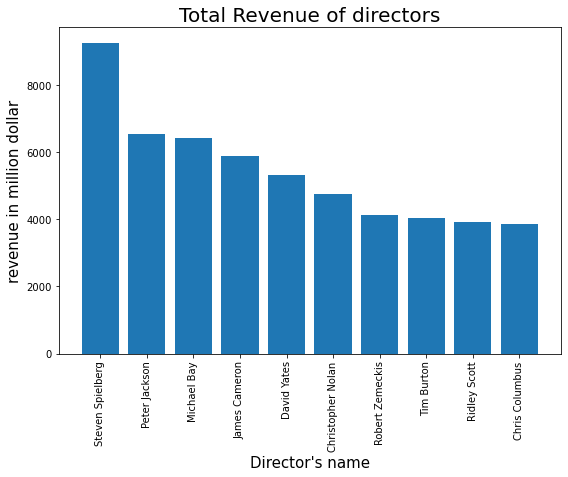

In [91]:
plt.figure(figsize=(9,6))
plt.bar(succ_dir['director'],succ_dir['revenue_musd'])
plt.title('Total Revenue of directors',fontsize=20)
plt.ylabel('revenue in million dollar',fontsize=15)
plt.xlabel("Director's name",fontsize=15)
plt.xticks(rotation=90);

<b> here is function which helps to create graph </b>

In [92]:
def graph(x,y,title,xaxis,yaxis):
    plt.figure(figsize=(9,6))
    plt.bar(x,y)
    plt.title(title,fontsize=20)
    plt.ylabel(yaxis,fontsize=15)
    plt.xlabel(xaxis,fontsize=15)
    plt.xticks(rotation=90);

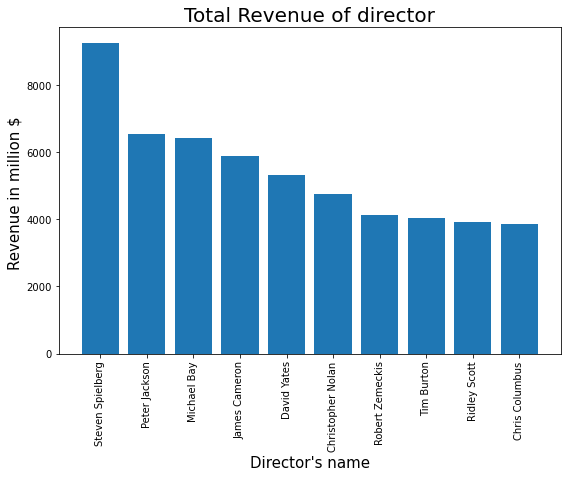

In [93]:
graph(succ_dir['director'],succ_dir['revenue_musd'],
      title='Total Revenue of director',
      xaxis="Director's name",
     yaxis="Revenue in million $ ")

In [94]:
act_dir=df['director'].value_counts().nlargest(10)
act_dir

John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Woody Allen         49
Georges Méliès      49
Jean-Luc Godard     46
Sidney Lumet        46
Charlie Chaplin     44
Raoul Walsh         43
Name: director, dtype: int64

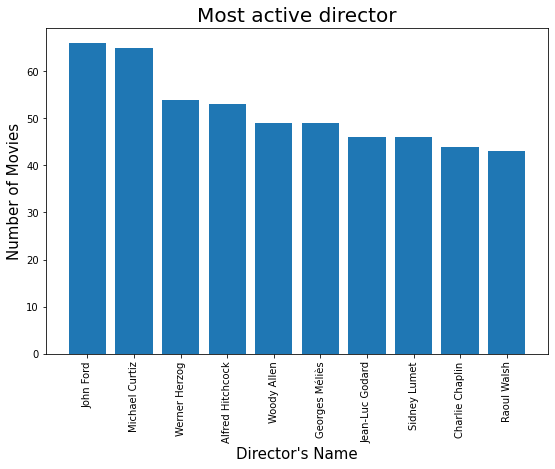

In [95]:
graph(act_dir.index,act_dir.values,
     title="Most active director",
     xaxis="Director's Name",
     yaxis="Number of Movies")

In [96]:
df.groupby('director').agg({'vote_count':'sum','title':'count','vote_average':'mean'}).nlargest(10,columns='vote_count')

,vote_count,title,vote_average
director,,,
Christopher Nolan,67344.0,11,7.618182
Steven Spielberg,62266.0,33,6.893939
Peter Jackson,47571.0,13,7.138462
Quentin Tarantino,45910.0,10,7.490000
Ridley Scott,43083.0,24,6.604167
Robert Zemeckis,37666.0,19,6.794737
David Fincher,37588.0,10,7.350000
Tim Burton,36922.0,21,6.733333
Martin Scorsese,35541.0,39,7.218421


In [97]:
df['genres'].dtypes

dtype('O')

In [98]:
df['genres']=df['genres'].astype(str)

In [99]:
df.loc[df['genres'].str.contains('Horror')].shape

(4634, 25)

In [100]:
df.loc[df['genres'].str.contains('Horror')].groupby('director').revenue_musd.sum().nlargest(10)

director
Paul W.S. Anderson     982.288069
James Wan              861.308375
Wes Craven             834.932742
Francis Lawrence       816.233738
Ridley Scott           689.004312
Marc Forster           531.865000
Steven Spielberg       500.104919
William Friedkin       466.403172
Darren Lynn Bousman    456.342667
M. Night Shyamalan     375.372060
Name: revenue_musd, dtype: float64

In [101]:
df.loc[df['genres'].str.contains('Horror')].groupby('director').agg({'revenue_musd':'sum'}).nlargest(10,columns='revenue_musd')

,revenue_musd
director,
Paul W.S. Anderson,982.288069
James Wan,861.308375
Wes Craven,834.932742
Francis Lawrence,816.233738
Ridley Scott,689.004312
Marc Forster,531.865000
Steven Spielberg,500.104919
William Friedkin,466.403172
Darren Lynn Bousman,456.342667


## Most Successful Actors

In [102]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'profit', 'roi', 'franchise'],
      dtype='object')

In [103]:
df[['cast']]

,cast
0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette
1,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyru...
2,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia Loren|Daryl Hannah|Burgess Meredith|Kevin Pollak
3,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Michael Beach|Mykelti Williamson|Lamont Johnson|Wesley Snipes
4,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Lori Alan
...,...
44686,Leila Hatami|Kourosh Tahami|Elham Korda
44687,Angel Aquino|Perry Dizon|Hazel Orencio|Joel Torre|Bart Guingona|Soliman Cruz |Roeder|Angeli Bayani|Dante Perez|Betty Uy-Regala|Modesta
44688,Erika Eleniak|Adam Baldwin|Julie du Page|James Remar|Damian Chapa|Louis Mandylor|Tom Wright|Jeremy Lelliott|James Quattrochi|Jason Widener|Joe Sabatino|Kiko Ellsworth|Don Swayze|Peter Dobson|Darre...
44689,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlov|Aleksandr Chabrov|Vera Orlova


In [104]:
df.set_index('id',inplace=True)

In [105]:
df.head(2)

,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,...,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,profit,roi,franchise
id,,,,,,,,,,,,,,,,,,,,,
862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,...,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circum...",English,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette,13,106,John Lasseter,343.554033,12.451801,True
8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Communications,United States of America,...,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- in...",English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyru...,26,16,Joe Johnston,197.797249,4.043035,False


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44691 entries, 862 to 461257
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  44691 non-null  object        
 1   tagline                20284 non-null  object        
 2   release_date           44657 non-null  datetime64[ns]
 3   genres                 44691 non-null  object        
 4   belongs_to_collection  4463 non-null   object        
 5   original_language      44681 non-null  object        
 6   budget_musd            8854 non-null   float64       
 7   revenue_musd           7385 non-null   float64       
 8   production_companies   33356 non-null  object        
 9   production_countries   38835 non-null  object        
 10  vote_count             44691 non-null  float64       
 11  vote_average           42077 non-null  float64       
 12  popularity             44691 non-null  float64       
 13

In [107]:
df['cast'].str.split('|')

id
862                      [Tom Hanks, Tim Allen, Don Rickles, Jim Varney, Wallace Shawn, John Ratzenberger, Annie Potts, John Morris, Erik von Detten, Laurie Metcalf, R. Lee Ermey, Sarah Freeman, Penn Jillette]
8844      [Robin Williams, Jonathan Hyde, Kirsten Dunst, Bradley Pierce, Bonnie Hunt, Bebe Neuwirth, David Alan Grier, Patricia Clarkson, Adam Hann-Byrd, Laura Bell Bundy, James Handy, Gillian Barber, Brand...
15602                                                                                                      [Walter Matthau, Jack Lemmon, Ann-Margret, Sophia Loren, Daryl Hannah, Burgess Meredith, Kevin Pollak]
31357                                            [Whitney Houston, Angela Bassett, Loretta Devine, Lela Rochon, Gregory Hines, Dennis Haysbert, Michael Beach, Mykelti Williamson, Lamont Johnson, Wesley Snipes]
11862               [Steve Martin, Diane Keaton, Martin Short, Kimberly Williams-Paisley, George Newbern, Kieran Culkin, BD Wong, Peter Michael Goetz, Kate M

In [108]:
df['cast'].str.split('|',expand=True).head()

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,...,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,...,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,...,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,...,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,...,None,None,None,None,None,None,None,None,None,None


In [109]:
actor=df['cast'].str.split('|',expand=True)
actor

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,...,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,...,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,...,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,...,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
111109,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,...,None,None,None,None,None,None,None,None,None,None
67758,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,...,None,None,None,None,None,None,None,None,None,None


In [110]:
act=actor.stack().reset_index(level=1,drop=True).to_frame()

In [112]:
act.head()

,0
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn


In [113]:
act.columns=['actor']

In [114]:
act

,actor
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [117]:
act=act.merge(df[['title','revenue_musd','vote_average','popularity']],
             how='left',left_index=True,right_index=True)

In [118]:
act

,actor,title,revenue_musd,vote_average,popularity
id,,,,,
2,Turo Pajala,Ariel,NaN,7.1,3.860491
2,Susanna Haavisto,Ariel,NaN,7.1,3.860491
2,Matti Pellonpää,Ariel,NaN,7.1,3.860491
2,Eetu Hilkamo,Ariel,NaN,7.1,3.860491
3,Matti Pellonpää,Shadows in Paradise,NaN,7.1,2.292110
...,...,...,...,...,...
469172,Vasco Sequeira,Manuel on the Island of Wonders,NaN,NaN,0.001097
469172,Armanda Bacelar,Manuel on the Island of Wonders,NaN,NaN,0.001097
469172,Rafael de Sousa,Manuel on the Island of Wonders,NaN,NaN,0.001097


In [119]:
act['actor'].nunique()

201501

In [123]:
active_actor=act['actor'].value_counts().nlargest(10)
active_actor

Bess Flowers         240
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    122
Michael Caine        110
John Carradine       109
Gérard Depardieu     109
Donald Sutherland    108
Jackie Chan          108
Frank Welker         107
Name: actor, dtype: int64

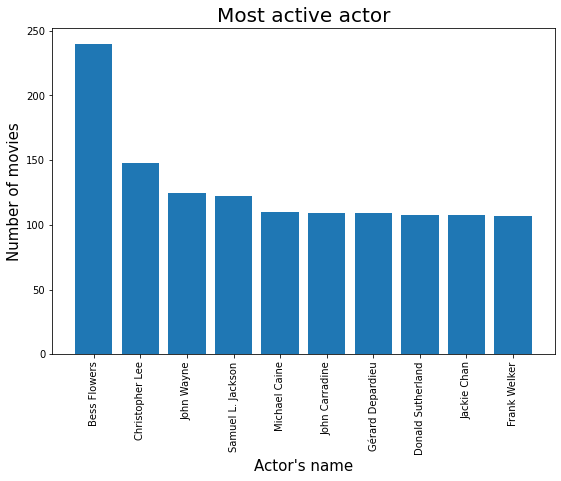

In [124]:
x=active_actor.index
y=active_actor.values
graph(x,y,title='Most active actor',
     xaxis="Actor's name",
     yaxis="Number of movies")

In [134]:
success_actor=act.groupby('actor').agg({'revenue_musd':'sum'}).reset_index().nlargest(10,columns='revenue_musd')
success_actor

,actor,revenue_musd
176466,Stan Lee,19414.957555
168082,Samuel L. Jackson,17109.620672
194942,Warwick Davis,13256.032188
60831,Frank Welker,13044.152470
93366,John Ratzenberger,12596.126073
87897,Jess Harnell,12234.608163
75441,Hugo Weaving,11027.578473
75993,Ian McKellen,11015.592318
93916,Johnny Depp,10653.760641
3338,Alan Rickman,10612.625348


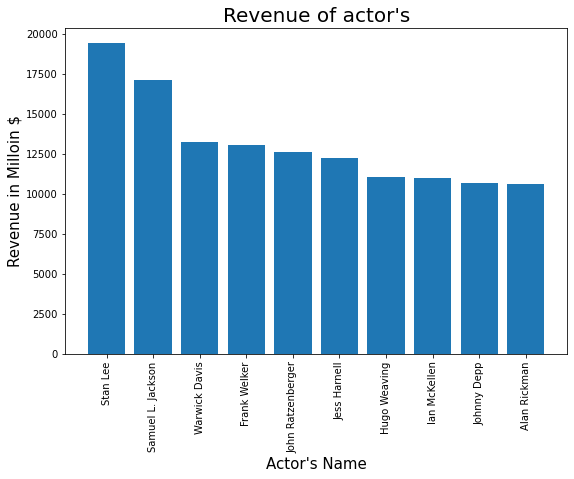

In [135]:
x=success_actor['actor']
y=success_actor['revenue_musd']
graph(x,y,title="Revenue of actor's",
     yaxis="Revenue in Milloin $",
     xaxis="Actor's Name")

In [138]:
act[['actor','popularity']].groupby('actor').agg({'popularity':'mean'}).reset_index().nlargest(10,columns='popularity')

,actor,popularity
4690,Alex Dowding,547.488298
1207,Adam Sef,294.337037
7624,Amber Doyle,294.337037
9090,Andrea Vasiliou,294.337037
11344,Ann Wolfe,294.337037
18658,Ben Kelleher,294.337037
20028,Betty Adewole,294.337037
24855,Brooke Ence,294.337037
26115,Caitlin Burles,294.337037
26571,Camilla Roholm,294.337037


In [139]:
from wordcloud import WordCloud

In [144]:
df.tagline[5]

"Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who's in for the wildest New year's Eve of his life."

In [145]:
df['tagline'][5]

"Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who's in for the wildest New year's Eve of his life."

In [146]:
df['overview'][5]

"It's Ted the Bellhop's first night on the job...and the hotel's very unusual guests are about to place him in some outrageous predicaments. It seems that this evening's room service is serving up one unbelievable happening after another."

In [147]:
df['title'].isnull().sum()

0

In [148]:
df['overview'].isnull().sum()

951

In [149]:
df['tagline'].isnull().sum()

24407

In [150]:
title=df['title'].dropna()
tagline=df['tagline'].dropna()
overview=df['overview'].dropna()

In [152]:
' '.join(title)

'Toy Story Jumanji Grumpier Old Men Waiting to Exhale Father of the Bride Part II Heat Sabrina Tom and Huck Sudden Death GoldenEye The American President Dracula: Dead and Loving It Balto Nixon Cutthroat Island Casino Sense and Sensibility Four Rooms Ace Ventura: When Nature Calls Money Train Get Shorty Copycat Assassins Powder Leaving Las Vegas Othello Now and Then Persuasion The City of Lost Children Shanghai Triad Dangerous Minds Twelve Monkeys Wings of Courage Babe Carrington Dead Man Walking Across the Sea of Time It Takes Two Clueless Cry, the Beloved Country Richard III Dead Presidents Restoration Mortal Kombat To Die For How To Make An American Quilt Se7en Pocahontas When Night Is Falling The Usual Suspects Guardian Angel Mighty Aphrodite Lamerica The Big Green Georgia Kids of the Round Table Home for the Holidays The Postman The Confessional The Indian in the Cupboard Eye for an Eye Mr. Holland\'s Opus Don\'t Be a Menace to South Central While Drinking Your Juice in the Hood T

In [153]:
title_corpus=' '.join(title)
tagline_corpus=' '.join(tagline)
overview_corpus=' '.join(overview)

### most used word in title

In [154]:
title_wordcloud=WordCloud(background_color='white',height=2000,width=4000).generate(title_corpus)
title_wordcloud

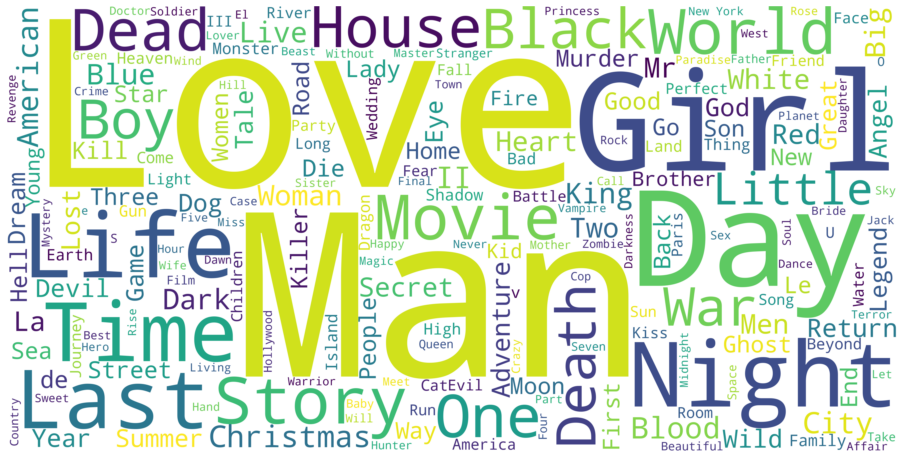

In [159]:
plt.figure(figsize=(16,12))
plt.imshow(title_wordcloud,interpolation='bilinear')
plt.axis('off');

### most used word in tagline

In [155]:
tagline_wordcloud=WordCloud(background_color='white',height=2000,width=4000).generate(tagline_corpus)
tagline_wordcloud

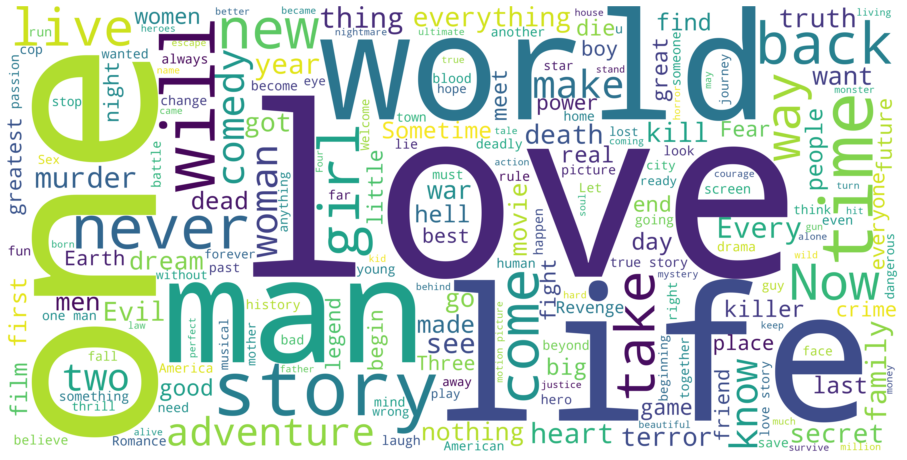

In [160]:
plt.figure(figsize=(16,12))
plt.imshow(tagline_wordcloud,interpolation='bilinear')
plt.axis('off');

### most used word in overview

In [156]:
overview_wordcloud=WordCloud(background_color='white',height=2000,width=4000).generate(overview_corpus)
overview_wordcloud

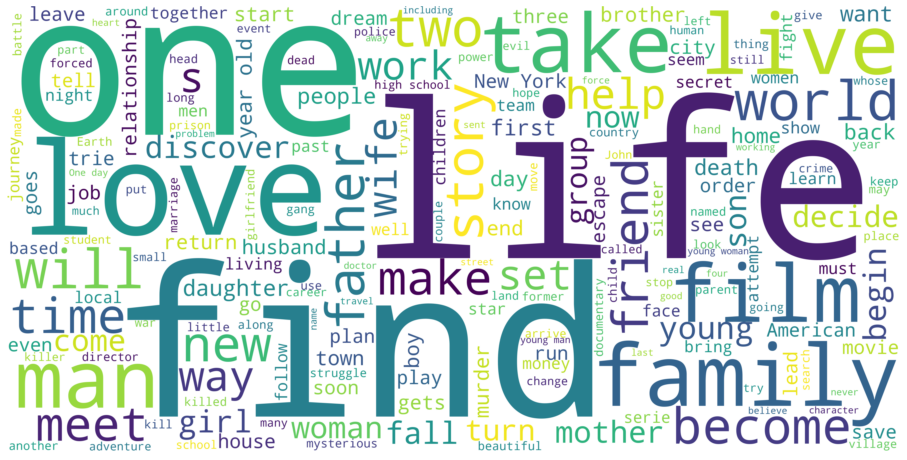

In [162]:
plt.figure(figsize=(16,12))
plt.imshow(overview_wordcloud,interpolation='bilinear')
plt.axis('off');